# Tree-Based Methods

## Contents

- [Imports](#section1)
- [Introduction to Decision Tree Methods](#section2)
    - [Regression trees](#subsection2.1)
    - [Classification trees](#subsection2.2)
- [Ensemble Methods](#section3)
    - [Bias-variance trade-off](#subsection3.1)
    - [Bagging and random forests](#subsection3.2)
    - [Boosting](#subsection3.3)

- [Case Studies](#section4)
    - [Case study 1: Detect spam emails](#subsection4.1)

## Imports <a id="section1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline 

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

## Introduction to Decision Tree Methods <a id="section2"></a>

Decision tree methods are versatile machine learning algorithms that can perform both regression and classification tasks, or even multi-output tasks. They are simple and straightforward in interpretation, but they are typically not competitive with the supervised learning approaches discussed in previous lectures. Techniques like **bagging**, **random forests**, and **boosting** are therefore introduced to combine large numbers of trees which often results in dramatic improvements in prediction accuracy, at the expense of some loss in interpretation. 

### Regression trees <a id="subsection2.1"></a>

A regression tree is constructed based on a partition of $M$ regions $R_1$, $R_2$, ..., $R_M$, and the prediction of the response $y$ is made according to the following function:

$$
\hat{f}(\pmb{x}) = \sum\limits_{m=1}^M\hat{c}_mI(\pmb{x}\in R_m),
$$

where $I$ is the indicator function, which equals one if $\pmb{x}\in R_m$, and equals zero otherwise. The constant $\hat{c}_m$ is calculated as the sample average:

$$
\hat{c}_m = \text{ave}(y_i|\pmb{x}_i\in R_m).
$$

Intuitively speaking, the predicted value of $y$ for an observation $\pmb{x}\in R_m$ is the sample average $\hat{c}_m$ of all records $y_i$ such that $\pmb{x}_i\in R_m$. The partition of $M$ regions are created by a **greedy** algorithm, known as the **recursive binary split** method, which selects a predictor $x_j$ and a cut-point $s$ such that splitting the existing predictor space into the two regions of $x_j < s$ and $x_j \geq s$ leads to the greatest possible reduction in the sum of squared residuals.

<div class="alert alert-block alert-success">
<b>Example 1:</b>  
The dataset "wage.csv" provides information on a number of working individuals in the year 1976. Use a regression tree model to predict their hourly wages based on the years of working experience. 
</div>

In [2]:
wage = pd.read_csv('wage.csv')
wage

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,Female,False
1,3.24,12.0,22.0,Female,True
2,3.00,11.0,2.0,Male,False
3,6.00,8.0,44.0,Male,True
4,5.30,12.0,7.0,Male,True
...,...,...,...,...,...
521,15.00,16.0,14.0,Female,True
522,2.27,10.0,2.0,Female,False
523,4.67,15.0,13.0,Male,True
524,11.56,16.0,5.0,Male,True


In this example, the independent variable `exper` is used to predict the dependent variable `wage`. 

In [3]:
x, y = wage[['exper']], wage['wage']

The following code cell is used to fit the model with the data records, and the resultant tree structure with six leaf nodes (regions) is printed as strings. 

In [4]:
reg = DecisionTreeRegressor(max_leaf_nodes=6)
reg.fit(x, y)
print(export_text(reg, feature_names=list(x.columns)))

|--- exper <= 6.50
|   |--- exper <= 2.50
|   |   |--- value: [3.79]
|   |--- exper >  2.50
|   |   |--- value: [4.85]
|--- exper >  6.50
|   |--- exper <= 43.50
|   |   |--- exper <= 31.50
|   |   |   |--- exper <= 22.50
|   |   |   |   |--- value: [6.47]
|   |   |   |--- exper >  22.50
|   |   |   |   |--- value: [8.09]
|   |   |--- exper >  31.50
|   |   |   |--- value: [6.01]
|   |--- exper >  43.50
|   |   |--- value: [4.06]



Alternatively, the tree structure can be plotted by calling the function `plot_tree`, imported from the subpackage `sklearn.tree`. 

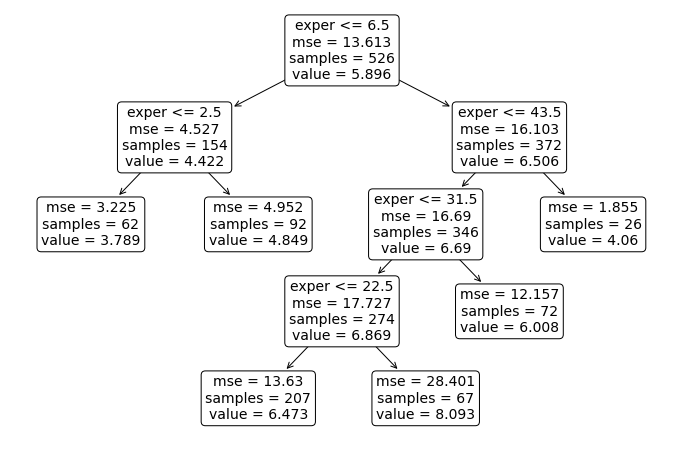

In [5]:
plt.figure(figsize=(12, 8))
plot_tree(reg, 
          rounded=True,                 # Rounded conners of nodes
          feature_names=x.columns,      # Feature names
          fontsize=14)
plt.show()

The tree structure shows that in each iteration, an existing region is split into two by a selected cut-point, until the maximum number of leaf nodes is reached. 

For each split region, the sample average of records of $y_i$ is used as the predicted value of $y$, as shown by the following graph.

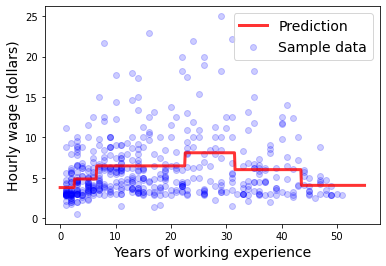

In [6]:
x_pred = np.arange(0, 55.1, 0.1)
x_pred = x_pred.reshape((x_pred.size, 1))
y_pred = reg.predict(x_pred)

plt.scatter(wage['exper'], wage['wage'], c='b', alpha=0.2, label='Sample data')
plt.plot(x_pred, y_pred, color='r', linewidth=3, alpha=0.8, label='Prediction')
plt.xlabel('Years of working experience', fontsize=14)
plt.ylabel('Hourly wage (dollars)', fontsize=14)
plt.legend(fontsize=14)
plt.show()

The same idea can be easily extended to more than one independent variables, such as in the following code segments, the response variable `wage` is predicted by predictors `educ` and `exper`. 

In [7]:
x, y = wage[['educ', 'exper']], wage['wage']
reg = DecisionTreeRegressor(max_leaf_nodes=6, min_samples_leaf=5)
reg.fit(x, y)
print(export_text(reg, feature_names=list(x.columns)))

|--- educ <= 15.50
|   |--- exper <= 6.50
|   |   |--- value: [3.77]
|   |--- exper >  6.50
|   |   |--- educ <= 12.50
|   |   |   |--- value: [5.34]
|   |   |--- educ >  12.50
|   |   |   |--- value: [6.98]
|--- educ >  15.50
|   |--- exper <= 7.50
|   |   |--- value: [6.64]
|   |--- exper >  7.50
|   |   |--- educ <= 16.50
|   |   |   |--- value: [9.30]
|   |   |--- educ >  16.50
|   |   |   |--- value: [12.88]



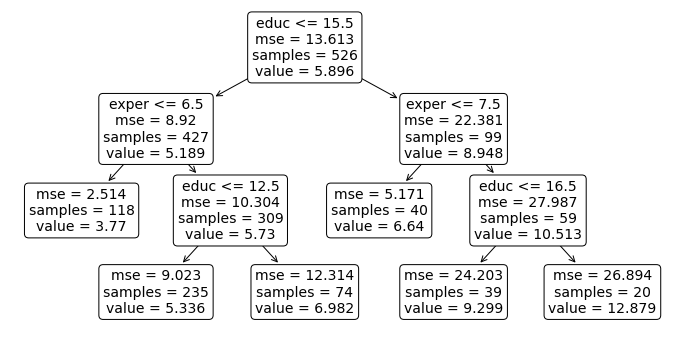

In [8]:
plt.figure(figsize=(12, 6))
plot_tree(reg, 
          rounded=True,                 # Rounded conner of nodes
          feature_names=x.columns,      # Feature names
          fontsize=14)
plt.show()

The tree structure suggest that in each iteration, an existing region is split into two as a predictor, either `exper` or `educ`, is branched by a selected cut-point. The process continues until the maximum number of leaf nodes is reached. 

The predicted values of `wage` are the sample average of data records in the corresponding regions, as shown by the following figure. 

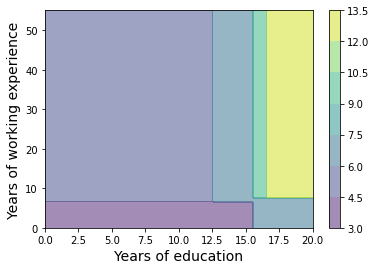

In [9]:
x1 = np.arange(0, 20.1, 0.1)
x2 = np.arange(0, 55.1, 0.1)

xx1, xx2 = np.meshgrid(x1, x2)
xx = pd.DataFrame({'educ': xx1.flatten(), 
                   'exper': xx2.flatten()})
yy = reg.predict(xx).reshape(xx1.shape)

plt.contourf(xx1, xx2, yy, alpha=0.5)
plt.colorbar()
plt.xlabel('Years of education', fontsize=14)
plt.ylabel('Years of working experience', fontsize=14)
plt.show()

The example above also shows that the tree model is easy to interpret, such as in this case, it is observed that people who have fewer than 6.5 years of working experience and fewer than 15.5 years of education receive the lowest hourly pay. Those who have more than 16.5 years of education and have at least 7.5 years of working experience have the highest hourly wage.

You may use the `help` function to explore other parameters of the tree model, and how they affect the structure of the regression tree model.

In [10]:
x, y = pd.get_dummies(wage.drop(columns='wage'), drop_first=True), wage['wage']
reg = DecisionTreeRegressor(max_leaf_nodes=6, min_samples_leaf=5)
reg.fit(x, y)
print(export_text(reg, feature_names=list(x.columns)))

|--- educ <= 15.50
|   |--- gender_Male <= 0.50
|   |   |--- value: [4.19]
|   |--- gender_Male >  0.50
|   |   |--- exper <= 6.50
|   |   |   |--- value: [3.96]
|   |   |--- exper >  6.50
|   |   |   |--- educ <= 11.50
|   |   |   |   |--- value: [5.23]
|   |   |   |--- educ >  11.50
|   |   |   |   |--- value: [7.72]
|--- educ >  15.50
|   |--- exper <= 7.50
|   |   |--- value: [6.64]
|   |--- exper >  7.50
|   |   |--- value: [10.51]



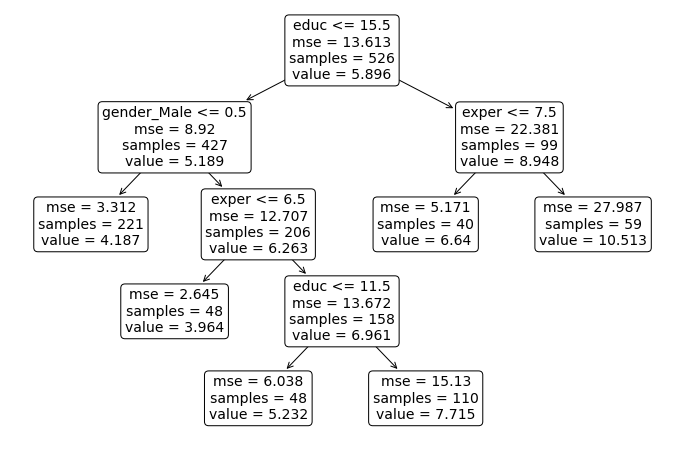

In [11]:
plt.figure(figsize=(12, 8))
plot_tree(reg, 
          rounded=True,                 # Rounded conner of nodes
          feature_names=x.columns,      # Feature names
          fontsize=14)
plt.show()

### Classification Trees <a id="subsection2.2"></a>

The tree-based methods can also be used for classification problems. Similar to many other classification approaches, we can predict a continuous probability of the class $k$ for each region $R_m$. The probability term is expressed as

$$
\hat{p}_{mk} = \frac{1}{N_m}\sum\limits_{\pmb{x}_i\in R_m} I(y_i=k), 
$$

where $N_m$ is the total number of records in region $R_m$. 

Recalling that for the regression tree, a binary split is generated in each iteration in seeking of the greatest reduction of the sum of squared residuals. The sum of squared residuals is clearly not suitable for the classification trees. A new split in classification tree is generated in pursuing the lowest impurity measures, such as:
- **Gini index**: $G=\sum_{k=1}^K\hat{p}_{mk}(1-\hat{p}_{mk})$,
- **Cross-entropy**: $D=-\sum_{k=1}^K\hat{p}_{mk}\log\hat{p}_{mk}$.

The intuition behind the **entropy** is discussed in [this video](https://www.youtube.com/watch?v=YtebGVx-Fxw&ab_channel=StatQuestwithJoshStarmer). You are also encouraged to verify with your own code that lower values of Gini index and cross-entropy can be achieved if the tree node is dominated by one class of observations. 

<div class="alert alert-block alert-success">
<b>Example 2:</b>  
 Consider the dataset "iris.csv" for classifying iris species based on their features such as sepal length, sepal width, petal length and petal width. Use a classification tree model to predict iris species based on two arbitrarily chosen features.
</div>

In [12]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The following code segment is used to choose two features as the predictor variables. 

In [13]:
columns = ['SepalWidthCm', 'PetalLengthCm']
x, y = iris[columns], iris['Species']

In [14]:
cls = DecisionTreeClassifier(max_leaf_nodes=6)
cls.fit(x, y)
print(export_text(cls, feature_names=list(x.columns)))

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalLengthCm <= 4.75
|   |   |--- class: Iris-versicolor
|   |--- PetalLengthCm >  4.75
|   |   |--- PetalLengthCm <= 5.05
|   |   |   |--- SepalWidthCm <= 3.05
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalWidthCm >  3.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  5.05
|   |   |   |--- SepalWidthCm <= 2.75
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalWidthCm >  2.75
|   |   |   |   |--- class: Iris-virginica



Similar to the regression tree, we can print the tree structure as texts or plot all tree nodes, as the code cell below.

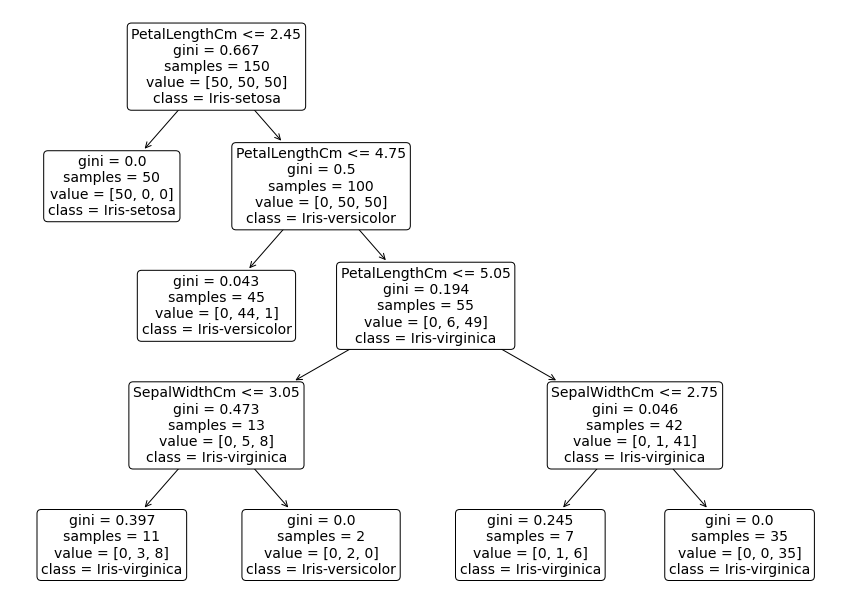

In [15]:
plt.figure(figsize=(15, 11))
plot_tree(cls, 
          rounded=True,                 # Rounded conner of nodes
          feature_names=x.columns,      # Feature names
          class_names=y.unique(),       # Class names
          fontsize=14)
plt.show()

In [16]:
def iris_2d(cls, x, y):
    """
    The function iris_2d is used to visualize the sample data and predicted 
    classes of the iris dataset.
    
    You are not required to understand details of this function.
    """
    colors = ['r', 'b', 'g']
    all_species = y.unique()
    columns = x.columns
    for species, color in zip(all_species, colors):
        subset = x.loc[y == species]
        plt.scatter(subset[columns[0]], subset[columns[1]], 
                    c=color, alpha=0.5, label=species)
    

    x1 = np.arange(x.iloc[:, 0].min(), x.iloc[:, 0].max()+0.1, 0.1)
    x2 = np.arange(x.iloc[:, 1].min(), x.iloc[:, 1].max()+0.1, 0.1)

    xx1, xx2 = np.meshgrid(x1, x2)
    xx = pd.DataFrame({columns[0]: xx1.flatten(), 
                       columns[1]: xx2.flatten()})
    yy = cls.predict(xx).reshape(xx1.shape)
    yy_num = np.zeros(yy.shape)
    yy_num[yy==all_species[1]] = 1
    yy_num[yy==all_species[2]] = 2

    plt.contourf(xx1, xx2, yy_num, levels=[-0.5, 0.5, 1.5, 2.5], colors=colors, alpha=0.2)
    plt.xlabel(columns[0], fontsize=14)
    plt.ylabel(columns[1], fontsize=14)
    plt.legend(fontsize=12)
    plt.show()

The predicted classes can be visualized as follows.

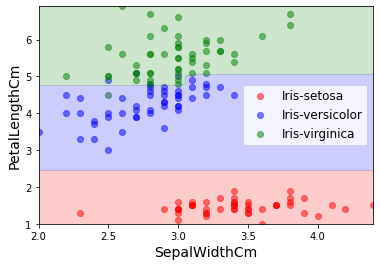

In [17]:
iris_2d(cls, x, y)

In the default setting, the Gini index is used in making new split in each iteration. You may also choose cross-entropy as the criterion for determining the best split by setting the keyword argument `criterion` to be `'entropy'`.

In [18]:
cls = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6)
cls.fit(x, y)
print(export_text(cls, feature_names=list(x.columns)))

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalLengthCm <= 4.75
|   |   |--- SepalWidthCm <= 2.55
|   |   |   |--- PetalLengthCm <= 4.45
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- PetalLengthCm >  4.45
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- SepalWidthCm >  2.55
|   |   |   |--- class: Iris-versicolor
|   |--- PetalLengthCm >  4.75
|   |   |--- PetalLengthCm <= 5.15
|   |   |   |--- class: Iris-virginica
|   |   |--- PetalLengthCm >  5.15
|   |   |   |--- class: Iris-virginica



The resultant classification tree will be slightly different from the previous case.

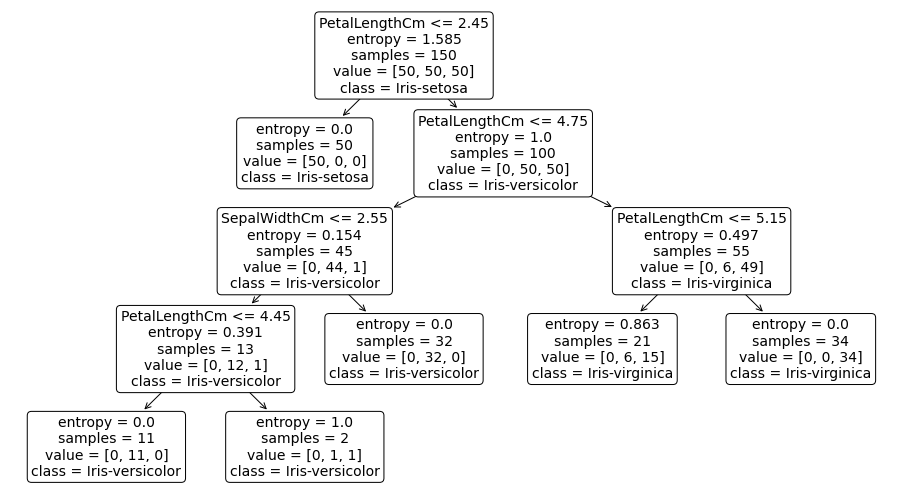

In [19]:
plt.figure(figsize=(16, 9))
plot_tree(cls, 
          rounded=True,                 # Rounded conner of nodes
          feature_names=x.columns,      # Feature names
          class_names=y.unique(),       # Class names
          fontsize=14)
plt.show()

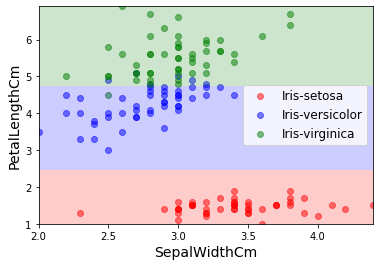

In [20]:
iris_2d(cls, x, y)

## Ensemble Methods <a id="section3"></a>

### Bias-variance trade-off <a id="subsection3.1"></a>

> *The decision trees discussed in Section 8.1 suffer from high variance. This means that if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get could be
quite different.* - [An Introduction to Statistical Learning-with Applications in R](https://web.stanford.edu/~hastie/ISLR2/ISLRv2_website.pdf)

The following example is used to demonstrate how the performance of tree models are affected high variances, especially when too many leaf nodes are considered.

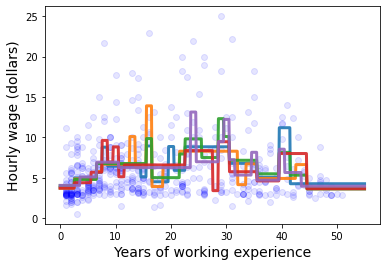

In [21]:
plt.scatter(wage['exper'], wage['wage'], 
            c='b', alpha=0.1, label='Sample data')              # Plot the sample data
 
max_leaf_nodes = 15                                             # Maximum number of leaf nodes
n = wage.shape[0]                                               # Number of records of the dataset
for i in range(5):                                              # Five experiments
    wage_sample = wage.sample(n, replace=True)                  # Create a random sample with n records
    x, y = wage_sample[['exper']], wage_sample['wage']          # Predictor and predicted variables
    reg = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)  # A regression tree object
    reg.fit(x, y)                                               # Fit the tree model by the sample data

    x_pred = np.arange(0, 55.1, 0.1)
    x_pred = x_pred.reshape((x_pred.size, 1))                   # An array of predictor variable values
    y_pred = reg.predict(x_pred)                                # An array of predicted values of response

    plt.plot(x_pred, y_pred, linewidth=3, alpha=0.9)            # Plot the predicted values
    
plt.xlabel('Years of working experience', fontsize=14)
plt.ylabel('Hourly wage (dollars)', fontsize=14)
plt.show()

The figure above shows that even for such a small dataset with only one predictor variable `exper`, there could be some "spikes" in the predicted values, leading to large variances. The performance of tree models can be improved by **ensemble methods**, such as bagging, random forest, and boosting, which build a prediction model by combining the strengths of a collection of simpler base models.

### Bagging and random forests <a id="subsection3.2"></a>

> *Recall that given a set of $n$ independent observations $Z_1$,..., $Z_n$, each with variance $\sigma^2$, the variance of the mean $\bar{Z}$ of the observations is given by $\sigma^2/n$. In other words, averaging a set of observations reduces variance. Hence a natural way to reduce the variance and hence increase the prediction accuracy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions.* - [An Introduction to Statistical Learning-with Applications in R](https://web.stanford.edu/~hastie/ISLRv2_website.pdf)

**Bootstrap aggregation**, or **bagging**, is a general-purpose procedure for reducing the variance of the statistical learning method by averaging the predictions of $B$ separate training sets. The aggregated prediction is therefore expressed as

$$\hat{f}_{\text{avg}}(\pmb{x}) = \frac{1}{B}\sum\limits_{i=1}^B\hat{f}_b(\pmb{x}),$$

In real applications, these different training sets are generated using **bootstrap**, which randomly sample the same number of records from the original training dataset with *replacement*. 

The performance of bagged trees can be further improved by **random forests**. When building decision trees for random forests, each time a split in a tree is considered, a random sample of $m$ predictors is chosen as split candidates from the full set of $p$ predictors. In other words, the split is allowed to use only one of those $m$ randomly selected predictors, instead of all (or even majority) of available predictor variables. 

> *This may sound crazy, but it has a clever rationale. Suppose that there is one very strong predictor in the data set, along with a number of other moderately strong predictors. Then in the collection of bagged trees, most or all of the trees will use this strong predictor in the top split. Consequently, all of the bagged trees will look quite similar to each other. Hence the predictions from the bagged trees will be highly correlated. Unfortunately, averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities.* - [An Introduction to Statistical Learning-with Applications in R](https://web.stanford.edu/~hastie/ISLRv2_website.pdf)

The main difference between bagging and random forests is the choice of predictor subset size $m$. For instance, if a random forest is built using $m = p$, then this amounts simply to bagging. In building random forests, the hyper-parameter $m$ is typically specified to be $\sqrt{p}$ or $\log_2(p)$. Alternatively, it can be determined by grid search and cross-validation. 

<div class="alert alert-block alert-success">
<b>Example 3:</b>  
Consider the dataset "College.csv" that provides statistics for 777 US Colleges from the 1995 issue of US News and World Report. Use bagging and random forests to predict the number of received applications. You could use 60% of the data as the training set, and remaining data could be used as a test set for assessing model performance.
</div>

In [22]:
college = pd.read_csv('College.csv')
college.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Information on variables of the dataset are provided [here](https://rdrr.io/cran/ISLR/man/College.html). The code cell below is used to create dummies for categorical variables. 

In [23]:
college_num = pd.get_dummies(college.drop(columns='Name'), drop_first=True)
college_num

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


Then we split the dataset into the training and test sets. 

In [24]:
x, y = college_num.drop(columns='Apps'), college_num['Apps']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

The bagging of regression trees can be implemented by the `RandomForestRegressor()` function, where the argument `max_features` takes the default value `'auto'`, so all predictors are considered in creating new splits of decision trees. 

In [25]:
regr = RandomForestRegressor()
regr.fit(x_train, y_train)
regr.score(x_test, y_test)

0.7914029322753422

In the case of bagging trees or random forests, we can record the total amount that the sum of squared residuals (Gini/entropy index for classification) is decreased due to splits over a given predictor, averaged over all $B$ trees. A large value indicates an important predictor in predicting the response variable.

The measure of variable importance can be accessed by the `feature_importance_` attribute of the tree model object. We thereby created the following function `show_importance()` to visualize the importance of variables.  

In [26]:
def show_importance(tr, columns, max_features=None):
    
    if max_features is None:
        max_features = x.shape[1]
    else:
        max_features = np.minimum(x.shape[1], max_features)
    
    imp = pd.Series(tr.feature_importances_, index=columns)
    imp = imp.sort_values(ascending=False)
    
    plt.figure(figsize=(5, max_features*0.55))
    plt.barh(imp.index[max_features-1::-1], 
             imp.iloc[max_features-1::-1], 
             height=0.6, color='b', alpha=0.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=15)
    plt.xlabel('Importance', fontsize=15)
    plt.grid()
    plt.show()

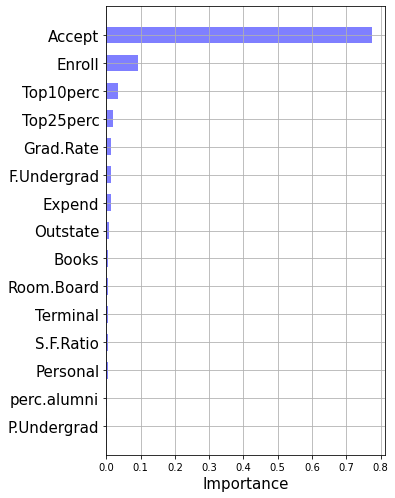

In [27]:
show_importance(regr, x_train.columns, 15)

The results show that the predictor `Accept` is the most important in predicting the number of applications (reducing the sum of squared residuals), while other predictors seem to be must less important in predicting the response variable. 

The `RandomForestRegressor()` function can also be used to implement random forests, where the keyword argument `max_feature` can be specified to be `"sqrt"` or `"log2"` as each split is restricted to a random subset of all predictors. 

In [28]:
regr = RandomForestRegressor(max_features='sqrt')
regr.fit(x_train, y_train)
regr.score(x_test, y_test)

0.7571918459278024

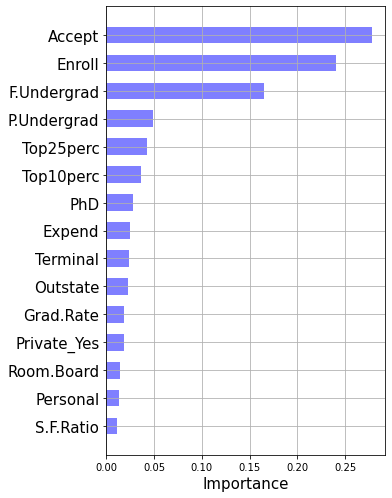

In [29]:
show_importance(regr, x_train.columns, 15)

In [30]:
regr = RandomForestRegressor(max_features='log2')
regr.fit(x_train, y_train)
regr.score(x_test, y_test)

0.7674542124485447

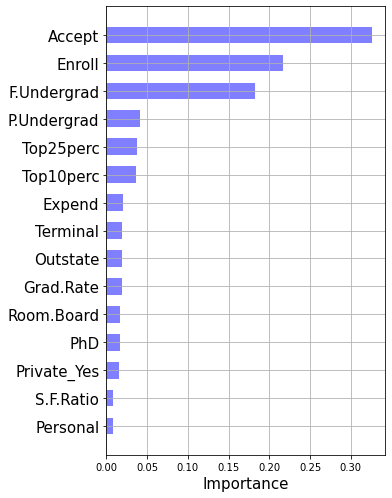

In [31]:
show_importance(regr, x_train.columns, 15)

The plots of variable importance of random forests are different from the bagging approach, as other predictors, such as `F.Undergrad`, `Enroll`, and `P.Undergrad` etc, have much larger impact on predicting the response variable `App`. This is because each tree of the random forests is less correlated or less alike, other variables are more likely to be selected to create new splits for decision trees.

### Boosting <a id="subsection3.3"></a>

Unlike bagging and random forests, **boosting** regressors grow trees in a sequential way to slowly reduce the residual. Given the current model, a decision tree is fit using the residuals, rather than the response variable. We then add this new decision tree into the fitted function in order to update the residuals. Each of these trees can be rather small, with just a few terminal nodes, determined by the parameter $d$ in the algorithm. By fitting small trees to the residuals, we slowly improve $\hat{f}$ in areas where it does not perform well.

A unique hyper-parameter of boosting models is the regularization parameter, or learning rate, as a small positive number $\lambda$. Typical values of $\lambda$ are 0.01 or 0.001, and the right choice can depend on the problem.

<div class="alert alert-block alert-success">
<b>Example 3:</b>  
Consider the dataset "College.csv" that provides statistics for 777 US Colleges from the 1995 issue of US News and World Report. Use boosting to predict the number of received applications. Please use cross-validation and grid search to determine the best value of the regularization parameter $\lambda$.  
</div>

In [32]:
param = {'boost__learning_rate': 10**np.arange(-3, 0, 0.25)}         
steps = [
    ('boost', GradientBoostingRegressor())
]                        

pipe = Pipeline(steps)                                      
search = GridSearchCV(pipe, param, cv=5, n_jobs=-1)                    
search.fit(x, y)                          

rate_best = search.best_params_['boost__learning_rate']                  
print('Best rate: {0}'.format(rate_best))                 
print('Best score: {0:0.3f}'.format(search.best_score_)) 

Best rate: 0.1
Best score: 0.894


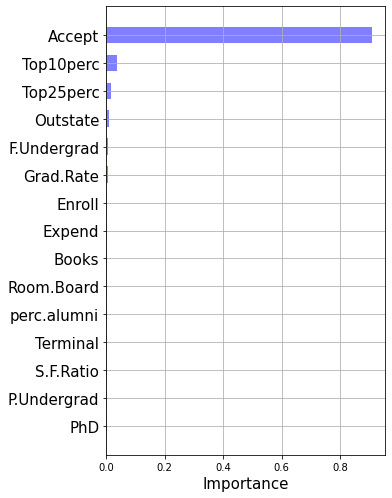

In [33]:
regr = GradientBoostingRegressor(learning_rate=rate_best)
regr.fit(x, y)
show_importance(regr, x_train.columns, 15)

In [34]:
param = {'boost__learning_rate': 10**np.arange(-3, 0, 0.25), 
         'boost__max_features': np.arange(1, 16)}         
steps = [
    ('boost', GradientBoostingRegressor())
]                        

pipe = Pipeline(steps)                                      
search = GridSearchCV(pipe, param, cv=5, n_jobs=-1)                    
search.fit(x, y)                          

rate_best = search.best_params_['boost__learning_rate']      
feature_best = search.best_params_['boost__max_features']                  
print('Best rate: {0}'.format(rate_best))    
print('Best number of features: {0}'.format(feature_best)) 
print('Best score: {0:0.3f}'.format(search.best_score_)) 

Best rate: 0.1778279410038923
Best number of features: 13
Best score: 0.901


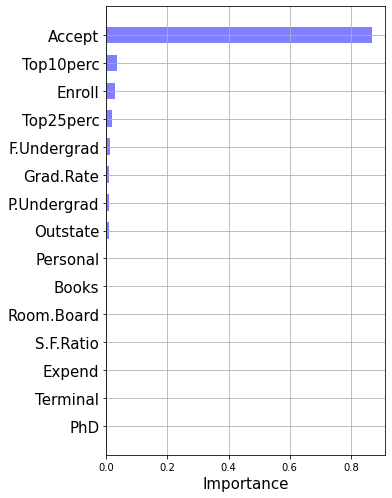

In [35]:
regr = GradientBoostingRegressor(learning_rate=rate_best, 
                                 max_features=feature_best)
regr.fit(x, y)
show_importance(regr, x_train.columns, 15)

## Case studies <a id="section4"></a>

### Case study 1: Detect spam emails <a id="subsection4.1"></a>

The file "spam.csv" provides a data collected at Hewlett-Packard Labs, which classifies 4601 emails as spam or non-spam. The first 54 variables give the frequencies of some key words and special symbols. The next three variables indicate the average, longest and total run-length of capital letters. The last variable `is_spam` tells if the email is spam or not. 

In [36]:
spam = pd.read_csv('spam.csv')
spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.1,0.32,0.20,0.30,0.40,0.50,0.60,...,0.400,0.410,0.42,0.778,0.430,0.440,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.00,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.00,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.00,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.00,0.135,0.000,0.000,3.537,40.0,191.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.00,0.000,0.000,0.000,1.142,3.0,88.0,0.0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.00,0.353,0.000,0.000,1.555,4.0,14.0,0.0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.00,0.000,0.000,0.000,1.404,6.0,118.0,0.0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.00,0.000,0.000,0.000,1.147,5.0,78.0,0.0


Use ensemble tree methods, such as bagging, random forests, and boosting to predict if an email is spam or not. You may use cross-validation and grid search to identify the best hyper-parameters for this dataset.  

In [37]:
x, y = spam.drop(columns='is_spam'), spam['is_spam']